In [48]:
# Importing the libraries 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from datetime import datetime
import os
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
ShipData = pd.read_excel("Ship Maintenance Data.xlsx")

In [6]:
print(ShipData)

       Fiscal Period Complete Date Service Order ID Notification ID  \
0            2018-01    2018-01-05         50006519       304645087   
1            2018-01    2018-01-05         50006519       304645087   
2            2018-01    2018-01-08         50006616       304645104   
3            2018-01    2018-01-08         50006616       304645104   
4            2018-01    2018-01-08         50006616       304645104   
5            2018-01    2018-01-08         50006616       304645104   
6            2018-01    2018-01-08         50006616       304645104   
7            2018-01    2018-01-08         50006616       304645104   
8            2018-01    2018-01-08         50006616       304645104   
9            2018-01    2018-01-08         50006616       304645104   
10           2018-01    2018-01-08         50006616       304645104   
11           2018-01    2018-01-22         50006618       304645106   
12           2018-01    2018-01-22         50006618       304645106   
13    

In [7]:
ShipDatadf = pd.DataFrame(ShipData)

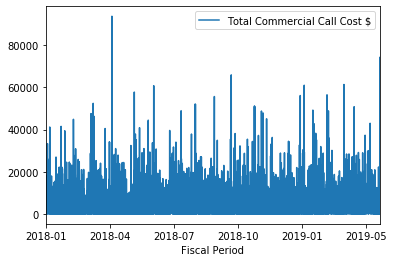

In [8]:
ShipDatadf.plot(x='Fiscal Period', y='Total Commercial Call Cost $', style='-')

In [16]:
#Tot_cost = ShipDatadf['Quantity']*ShipDatadf['Item Commercial Cost $']
#TotComCost = np.array(ShipDatadf['Total Commercial Call Cost $'])
#Tot_Fact_cost = np.array(ShipDatadf['Total Factory Call Cost $'])
#Fact_cost = ShipDatadf.iloc[:, 19].values
#Date = np.array(ShipDatadf['Complete Date'])

In [36]:
Summary = ShipData.describe()
Summary

,Sales Org,Warranty Length (Years),Days Out of Warranty,Equipment ID,Equipment Original Sales Order,Labor Hours,Travel Hours,Total Hours,Labor Cost $,Travel Cost $,Material Commercial Cost $,Total Commercial Call Cost $,Material Factory Cost $,Total Factory Call Cost $,Notification Detail Text,Quantity,Item Commercial Cost $,Item Factory Cost $
count,261510.0,241776.000000,261510.000000,2.615100e+05,1.856260e+05,261510.000000,261510.000000,261510.000000,261510.000000,261510.000000,261510.000000,261081.000000,261510.000000,261378.000000,0.0,260229.000000,259882.000000,261510.000000
mean,20.0,1.021776,1650.054442,1.295430e+07,3.253063e+06,7.194124,4.406048,11.600172,1048.085297,661.859680,1815.342033,3531.079437,1032.003438,2743.333142,NaN,3.355739,496.617002,144.382494
std,0.0,7.092644,1439.464463,1.310582e+06,1.065648e+07,39.738578,6.698602,41.028112,1342.999723,843.113383,3271.370151,4465.182118,1933.904671,3203.493948,NaN,18.976104,1010.879486,544.055110
min,20.0,-999.670000,0.000000,1.000051e+07,1.114000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,-525.220000,0.000000
25%,20.0,1.000000,507.000000,1.209214e+07,1.606374e+06,3.000000,1.000000,5.000000,388.780000,155.500000,172.840000,1233.120000,8.244000,1024.381639,NaN,1.000000,0.040000,0.000000
50%,20.0,1.000000,1332.000000,1.292206e+07,2.632120e+06,4.500000,3.000000,8.000000,675.050000,450.010000,782.220000,2287.340000,369.090000,1859.720000,NaN,1.000000,158.570000,0.000000
75%,20.0,1.000000,2501.000000,1.405394e+07,3.481367e+06,8.000000,6.000000,14.000000,1200.080000,900.010000,2141.490000,4170.840000,1251.200090,3383.620000,NaN,4.000000,600.000000,32.390000
max,20.0,24.130000,43023.000000,1.585913e+07,1.816224e+08,8764.000000,817.000000,8766.500000,79203.280000,22150.980000,71521.120000,93679.580000,67502.734443,90658.429872,NaN,8764.000000,79200.000000,48939.880000


In [37]:
Prev_Maint = ShipDatadf.loc[ShipDatadf['Call Type']=='PM - Preventive Maintenance']

In [38]:
Repairs = ShipDatadf.loc[ShipDatadf['Call Type']!='PM - Preventive Maintenance']

In [41]:
%matplotlib inline

In [45]:
mu = 3531.1 
sigma = 4465
x1 = 0
x2 = 93679.58

In [46]:
# calculate the z-transform
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

In [51]:
x = np.arange(z1, z2, 0.001) # range of x in spec
x_all = np.arange(0, 93000, 1000) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

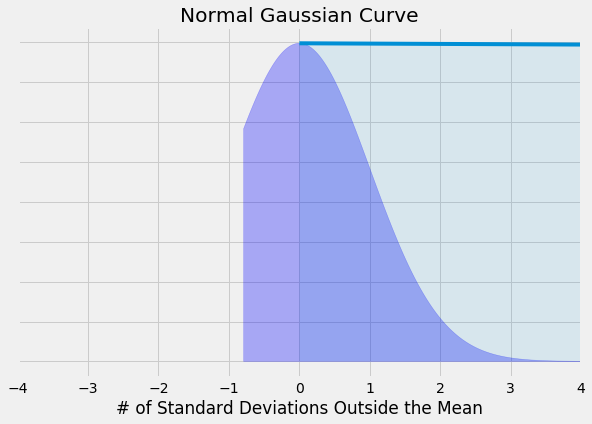

In [52]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')

plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()